In [1]:
import sys
sys.path.append('/scratch/nf33/sc5932/hk25-AusNode-TConvZones/functions')

from SC_function import get_nn_lon_lat_index

import xarray as xr
import healpy as hp
import easygems.healpix as egh
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from dask.diagnostics import ProgressBar


In [2]:
mean_era5_loaded = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_era5.nc').tp
mean_uk_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_uk_aligned.nc').pr
mean_germany_aligned = xr.open_dataset('/scratch/nf33/sc5932/Data/seasonal_germany_aligned.nc').pr

diff_germany = mean_germany_aligned - mean_era5_loaded
diff_uk = mean_uk_aligned - mean_era5_loaded


/scratch/wq02/sc5932/tmp/ipykernel_2895140/2873167382.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_2895140/2873167382.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_2895140/2873167382.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/scratch/wq02/sc5932/tmp/ipykernel_2895140/2873167382.py:104: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


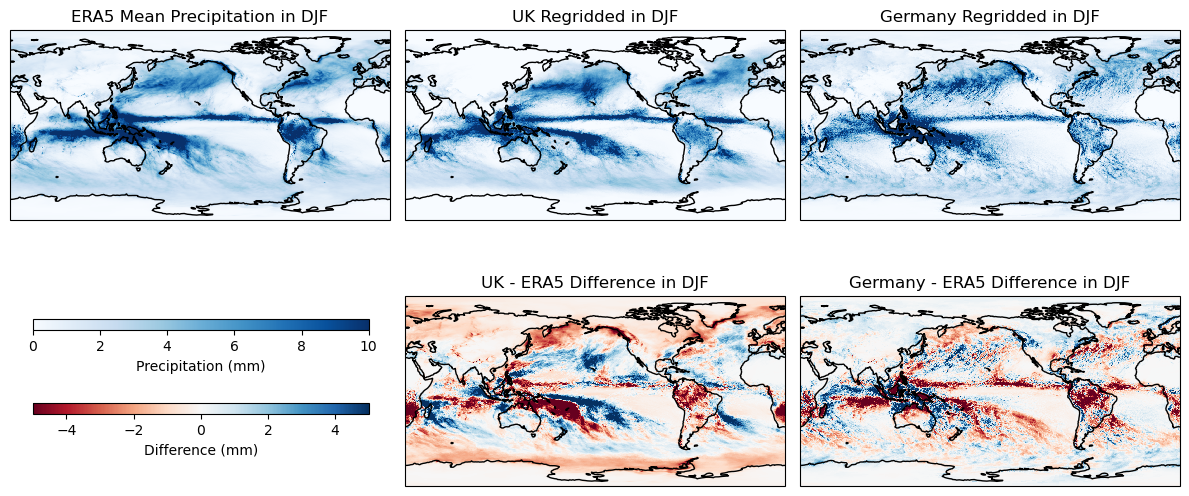

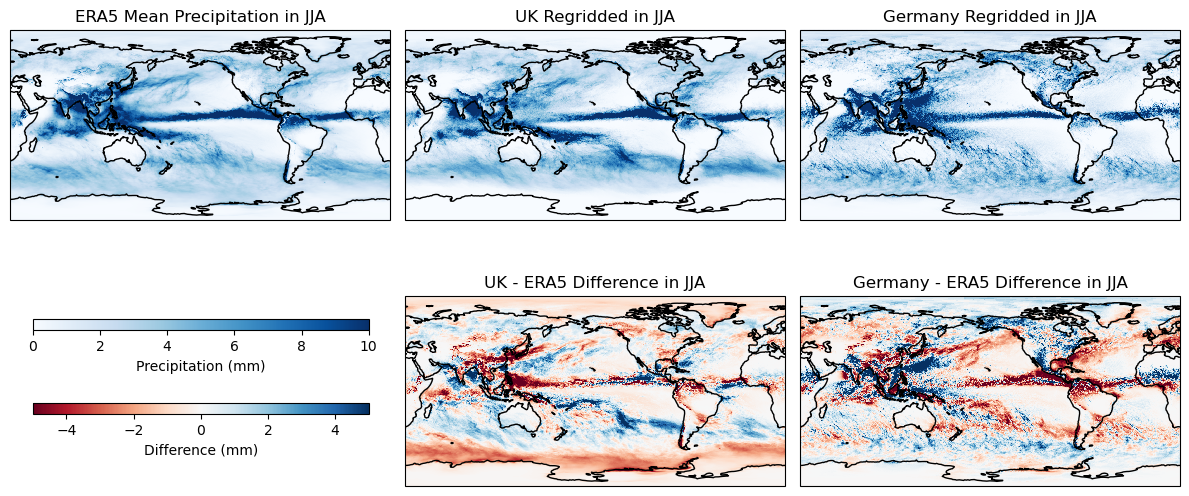

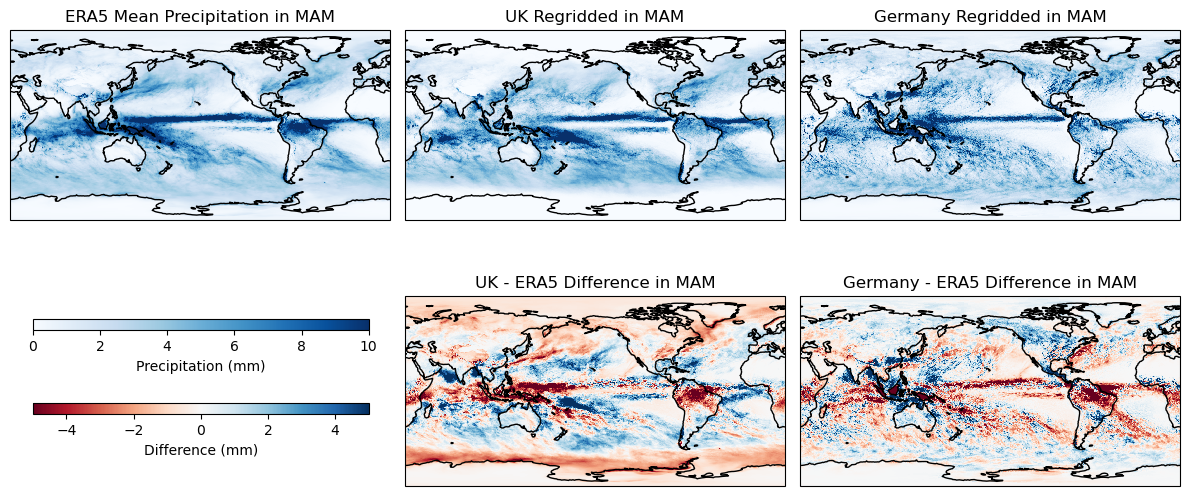

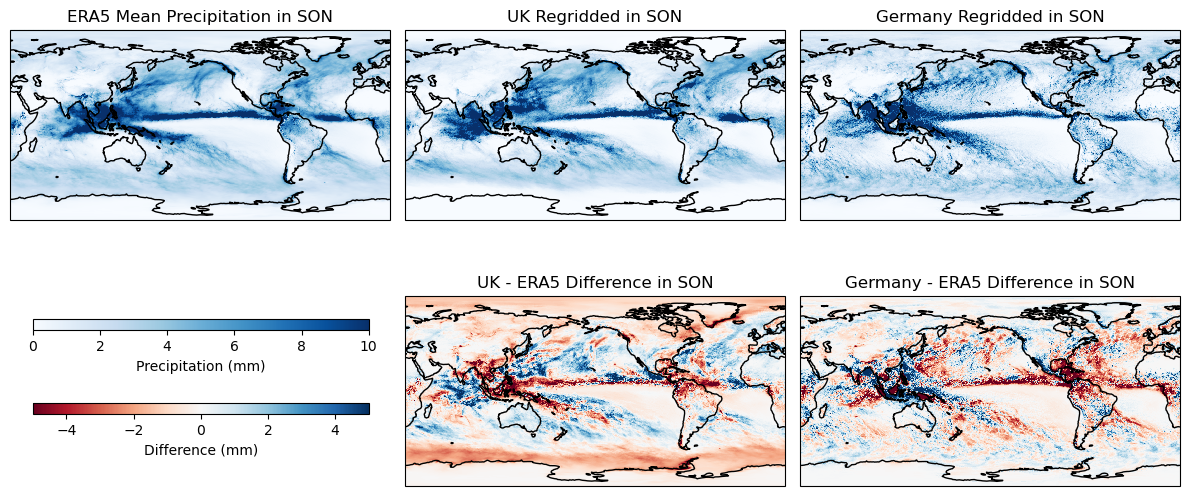

In [4]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

for mon in range (4):
    mon_name = ['DJF' , 'JJA' , 'MAM' , 'SON']
    mean_all = [
        mean_era5_loaded[mon],
        mean_uk_aligned[mon],
        mean_germany_aligned[mon],
        diff_uk[mon],
        diff_germany[mon]
    ]

    # Define projection
    projection = ccrs.PlateCarree(central_longitude=205)

    # Create 2 rows x 3 columns of subplots
    fig, axes = plt.subplots(2, 3, figsize=(12, 6), subplot_kw={'projection': projection})
    axes = axes.flatten()

    # Main color scale (for mean values)
    vmin_main, vmax_main = 0, 10

    # Difference color scale
    vmin_diff, vmax_diff = -5, 5

    # 1. Plot ERA5 Mean
    m0 = mean_all[0].plot(
        ax=axes[0],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[0].coastlines()
    axes[0].set_title('ERA5 Mean Precipitation in ' + mon_name[mon])

    # 2. UK Regridded
    mean_all[1].plot(
        ax=axes[1],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[1].coastlines()
    axes[1].set_title('UK Regridded in ' + mon_name[mon])

    # 3. Germany Regridded
    mean_all[2].plot(
        ax=axes[2],
        cmap='Blues',
        vmin=vmin_main,
        vmax=vmax_main,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[2].coastlines()
    axes[2].set_title('Germany Regridded in ' + mon_name[mon])

    # 4. UK - ERA5
    m1 = mean_all[3].plot(
        ax=axes[4],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[4].coastlines()
    axes[4].set_title('UK - ERA5 Difference in ' + mon_name[mon])

    # 5. Germany - ERA5
    mean_all[4].plot(
        ax=axes[5],
        cmap='RdBu',
        vmin=vmin_diff,
        vmax=vmax_diff,
        transform=ccrs.PlateCarree(),
        add_colorbar=False
    )
    axes[5].coastlines()
    axes[5].set_title('Germany - ERA5 Difference in ' + mon_name[mon])

    # Use axes[5] for the colorbars
    axes[3].axis('off')

    # Get position of axes[5]
    pos = axes[3].get_position()

    # Define inset axes for mean and diff colorbars inside axes[5]
    mean_cax = fig.add_axes([pos.x0 - 0.12, pos.y0 + 0.27, 1.6 * pos.width, 0.05 * pos.height])
    diff_cax = fig.add_axes([pos.x0 - 0.12, pos.y0 + 0.13, 1.6 * pos.width, 0.05 * pos.height])

    # Mean colorbar
    cbar_mean = fig.colorbar(m0, cax=mean_cax, orientation='horizontal')
    cbar_mean.set_label('Precipitation (mm)', fontsize=10)

    # Difference colorbar
    cbar_diff = fig.colorbar(m1, cax=diff_cax, orientation='horizontal')
    cbar_diff.set_label('Difference (mm)', fontsize=10)
    plt.tight_layout()
    name_save = "/scratch/nf33/sc5932/Fig/Diff_prcp_" + mon_name[mon]
    plt.savefig(name_save , dpi=300, bbox_inches='tight')
